# [Introduction to Data Science: A Comp-Math-Stat Approach](http://datascience-intro.github.io/1MS041-2020/)
## 1MS041, 2020 
&copy;2020 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Putting it all together

In this notebook we will consider a few analysis problem where you can utilize the techniques that you have learned during this course. 

In [1]:
def showURL(url, ht=500):
    """Return an IFrame of the url to show in notebook with height ht"""
    from IPython.display import IFrame
    return IFrame(url, width='95%', height=ht) 
showURL('http://jse.amstat.org/v19n3/decock.pdf',500)

The data is located at (http://jse.amstat.org/v19n3/decock/AmesHousing.txt)
so we need to download the data and load it

### Dataset description

Below is a description of the columns involved

* **SalePrice:** the property's sale price in dollars. This is the target variable that you're trying to predict.
* **MSSubClass:** The building class
* **MSZoning:** The general zoning classification
* **LotFrontage:** Linear feet of street connected to property
* **LotArea:** Lot size in square feet
* **Street:** Type of road access
* **Alley:** Type of alley access
* **LotShape:** General shape of property
* **LandContour:** Flatness of the property
* **Utilities:** Type of utilities available
* **LotConfig:** Lot configuration
* **LandSlope:** Slope of property
* **Neighborhood:** Physical locations within Ames city limits
* **Condition1:** Proximity to main road or railroad
* **Condition2:** Proximity to main road or railroad (if a second is present)
* **BldgType:** Type of dwelling
* **HouseStyle:** Style of dwelling
* **OverallQual:** Overall material and finish quality
* **OverallCond:** Overall condition rating
* **YearBuilt:** Original construction date
* **YearRemodAdd:** Remodel date
* **RoofStyle:** Type of roof
* **RoofMatl:** Roof material
* **Exterior1st:** Exterior covering on house
* **Exterior2nd:** Exterior covering on house (if more than one material)
* **MasVnrType:** Masonry veneer type
* **MasVnrArea:** Masonry veneer area in square feet
* **ExterQual:** Exterior material quality
* **ExterCond:** Present condition of the material on the exterior
* **Foundation:** Type of foundation
* **BsmtQual:** Height of the basement
* **BsmtCond:** General condition of the basement
* **BsmtExposure:** Walkout or garden level basement walls
* **BsmtFinType1:** Quality of basement finished area
* **BsmtFinSF1:** Type 1 finished square feet
* **BsmtFinType2:** Quality of second finished area (if present)
* **BsmtFinSF2:** Type 2 finished square feet
* **BsmtUnfSF:** Unfinished square feet of basement area
* **TotalBsmtSF:** Total square feet of basement area
* **Heating:** Type of heating
* **HeatingQC:** Heating quality and condition
* **CentralAir:** Central air conditioning
* **Electrical:** Electrical system
* **1stFlrSF:** First Floor square feet
* **2ndFlrSF:** Second floor square feet
* **LowQualFinSF:** Low quality finished square feet (all floors)
* **GrLivArea:** Above grade (ground) living area square feet
* **BsmtFullBath:** Basement full bathrooms
* **BsmtHalfBath:** Basement half bathrooms
* **FullBath:** Full bathrooms above grade
* **HalfBath:** Half baths above grade
* **Bedroom:** Number of bedrooms above basement level
* **Kitchen:** Number of kitchens
* **KitchenQual:** Kitchen quality
* **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
* **Functional:** Home functionality rating
* **Fireplaces:** Number of fireplaces
* **FireplaceQu:** Fireplace quality
* **GarageType:** Garage location
* **GarageYrBlt:** Year garage was built
* **GarageFinish:** Interior finish of the garage
* **GarageCars:** Size of garage in car capacity
* **GarageArea:** Size of garage in square feet
* **GarageQual:** Garage quality
* **GarageCond:** Garage condition
* **PavedDrive:** Paved driveway
* **WoodDeckSF:** Wood deck area in square feet
* **OpenPorchSF:** Open porch area in square feet
* **EnclosedPorch:** Enclosed porch area in square feet
* **3SsnPorch:** Three season porch area in square feet
* **ScreenPorch:** Screen porch area in square feet
* **PoolArea:** Pool area in square feet
* **PoolQC:** Pool quality
* **Fence:** Fence quality
* **MiscFeature:** Miscellaneous feature not covered in other categories
* **MiscVal:** $Value of miscellaneous feature
* **MoSold:** Month Sold
* **YrSold:** Year Sold
* **SaleType:** Type of sale
* **SaleCondition:** Condition of sale

In [2]:
import requests
response = requests.get('http://jse.amstat.org/v19n3/decock/AmesHousing.txt')

In [3]:
raw_data = response.content

In [4]:
utf8_data = raw_data.decode('utf8')
utf8_data[:100]

'Order\tPID\tMS SubClass\tMS Zoning\tLot Frontage\tLot Area\tStreet\tAlley\tLot Shape\tLand Contour\tUtilities\t'

In [5]:
lines = utf8_data.split('\n')

In [6]:
header = lines[0].split('\t')
print(header)

['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck 

In [7]:
data = [line.split('\t') for line in lines[1:]]

In [8]:
print(data[0])

['1', '0526301100', '020', 'RL', '141', '31770', 'Pave', 'NA', 'IR1', 'Lvl', 'AllPub', 'Corner', 'Gtl', 'NAmes', 'Norm', 'Norm', '1Fam', '1Story', '6', '5', '1960', '1960', 'Hip', 'CompShg', 'BrkFace', 'Plywood', 'Stone', '112', 'TA', 'TA', 'CBlock', 'TA', 'Gd', 'Gd', 'BLQ', '639', 'Unf', '0', '441', '1080', 'GasA', 'Fa', 'Y', 'SBrkr', '1656', '0', '0', '1656', '1', '0', '1', '0', '3', '1', 'TA', '7', 'Typ', '2', 'Gd', 'Attchd', '1960', 'Fin', '2', '528', 'TA', 'TA', 'P', '210', '62', '0', '0', '0', '0', 'NA', 'NA', 'NA', '0', '5', '2010', 'WD ', 'Normal', '215000']


Conclusion, we seem to have numerical and textual data (numerical and categorical). What we need to do is to convert the categorial data into numerical data. Furthermore, the numerical data is stored as `Strings` so we need to decode those as well.

In [9]:
print(list(zip(header,data[0])))

[('Order', '1'), ('PID', '0526301100'), ('MS SubClass', '020'), ('MS Zoning', 'RL'), ('Lot Frontage', '141'), ('Lot Area', '31770'), ('Street', 'Pave'), ('Alley', 'NA'), ('Lot Shape', 'IR1'), ('Land Contour', 'Lvl'), ('Utilities', 'AllPub'), ('Lot Config', 'Corner'), ('Land Slope', 'Gtl'), ('Neighborhood', 'NAmes'), ('Condition 1', 'Norm'), ('Condition 2', 'Norm'), ('Bldg Type', '1Fam'), ('House Style', '1Story'), ('Overall Qual', '6'), ('Overall Cond', '5'), ('Year Built', '1960'), ('Year Remod/Add', '1960'), ('Roof Style', 'Hip'), ('Roof Matl', 'CompShg'), ('Exterior 1st', 'BrkFace'), ('Exterior 2nd', 'Plywood'), ('Mas Vnr Type', 'Stone'), ('Mas Vnr Area', '112'), ('Exter Qual', 'TA'), ('Exter Cond', 'TA'), ('Foundation', 'CBlock'), ('Bsmt Qual', 'TA'), ('Bsmt Cond', 'Gd'), ('Bsmt Exposure', 'Gd'), ('BsmtFin Type 1', 'BLQ'), ('BsmtFin SF 1', '639'), ('BsmtFin Type 2', 'Unf'), ('BsmtFin SF 2', '0'), ('Bsmt Unf SF', '441'), ('Total Bsmt SF', '1080'), ('Heating', 'GasA'), ('Heating QC',

In [10]:
# Ok, there is a lot of manual work here, lets just choose a few of these as numerical features
numerical_features = ['Lot Frontage',
                      'Lot Area',
                      'Overall Cond',
                      'Overall Quality',
                      'Year Built',
                      'Year Remod/Add',
                      'Mas Vnr Area',
                      'BsmtFin SF 1',
                      'BsmtFin SF 2',
                      'Bsmt Unf SF', 
                      'Total Bsmt SF', 
                      '1st Flr SF',
                      '2nd Flr SF',
                      'Fireplaces',
                      'Garage Yr Blt',
                      'Garage Cars',
                      'Garage Area',
                      'Wood Deck SF',
                      'Open Porch SF',
                      'Mo Sold',
                      'Yr Sold',
                      'Gr Liv Area',
                      'SalePrice']
categorical_features = list(set(header)-set(numerical_features))

In [11]:
print(numerical_features)

['Lot Frontage', 'Lot Area', 'Overall Cond', 'Overall Quality', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Mo Sold', 'Yr Sold', 'Gr Liv Area', 'SalePrice']


In [12]:
print(categorical_features)

['Low Qual Fin SF', 'Enclosed Porch', 'Alley', 'House Style', 'Half Bath', 'Mas Vnr Type', 'Bsmt Exposure', 'Screen Porch', 'Garage Type', 'Full Bath', 'Bsmt Qual', 'Condition 2', 'Overall Qual', 'Lot Shape', 'Condition 1', 'BsmtFin Type 1', 'Kitchen Qual', 'Garage Finish', 'Street', 'Lot Config', 'Land Slope', 'Bsmt Cond', 'Bsmt Half Bath', 'Exterior 2nd', 'Sale Condition', 'Bsmt Full Bath', 'MS Zoning', 'Neighborhood', 'Pool Area', 'Pool QC', 'Misc Feature', 'PID', 'BsmtFin Type 2', 'Garage Cond', 'Garage Qual', 'Electrical', 'Exterior 1st', 'Foundation', 'Heating', 'Exter Cond', 'Central Air', 'Functional', 'Land Contour', 'Bldg Type', 'MS SubClass', 'Sale Type', 'Order', 'Fence', 'Heating QC', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Misc Val', 'Bedroom AbvGr', 'Paved Drive', '3Ssn Porch', 'Utilities', 'Exter Qual', 'Roof Style', 'Roof Matl', 'Fireplace Qu']


## What to do about these features?

Ok, so the numerical features should be encoded into their respective number, this we can do by casting the string to a number. It seems we can try casting to `int`

In [13]:
def column_dict(values):
    enum_val = list(enumerate(set(values)))
    
    return dict([val[::-1] for val in enum_val])

def header_dict(values):
    enum_val = list(enumerate(values))
    
    return dict([val[::-1] for val in enum_val]),dict(enum_val)

In [14]:
def column_to_int(values):
    return [int(value) for value in values]

In [15]:
colname_to_index,index_to_colname = header_dict(header)

In [16]:
columns = [i for i in zip(*data[:-1])]

In [17]:
column_dicts = {name: column_dict(column) for name,column in zip(header,columns) if name in categorical_features}

In [18]:
column_dicts.keys()

dict_keys(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val', 'Sale Type', 'Sale Condition'])

In [19]:
list(map(column_dicts['Order'].get, columns[0]))

[194,
 1026,
 1901,
 1206,
 1085,
 1142,
 2262,
 1493,
 796,
 1267,
 676,
 2286,
 2132,
 341,
 2724,
 1728,
 1650,
 2762,
 2194,
 196,
 1407,
 2614,
 808,
 2677,
 647,
 1440,
 1501,
 2527,
 680,
 1602,
 707,
 2524,
 1691,
 2185,
 2494,
 2560,
 2050,
 2033,
 2062,
 1242,
 2606,
 955,
 1411,
 2540,
 1454,
 2605,
 2047,
 1034,
 2750,
 464,
 890,
 1139,
 635,
 303,
 723,
 978,
 438,
 2021,
 374,
 1595,
 991,
 1772,
 1486,
 2831,
 1965,
 225,
 2225,
 2484,
 126,
 2239,
 1905,
 2290,
 214,
 2790,
 572,
 2517,
 1035,
 2236,
 212,
 2661,
 100,
 848,
 94,
 2799,
 1218,
 1387,
 773,
 2085,
 2001,
 1058,
 1276,
 1946,
 1104,
 2111,
 677,
 192,
 2272,
 807,
 1229,
 1179,
 1927,
 1260,
 347,
 317,
 1573,
 2114,
 2485,
 1064,
 2510,
 1911,
 1852,
 523,
 1283,
 832,
 1177,
 1093,
 2289,
 1214,
 2791,
 1606,
 1304,
 412,
 1328,
 1645,
 539,
 1577,
 329,
 1864,
 274,
 2175,
 2234,
 517,
 2031,
 2562,
 315,
 2875,
 1996,
 2439,
 482,
 1368,
 229,
 554,
 1755,
 936,
 230,
 2147,
 191,
 1995,
 2779,
 2741

In [20]:
def make_data_numerical(header,columns,column_dicts):
    mapped_columns = []
    for name,column in zip(header,columns):
        if (name in column_dicts):
            mapped_columns.append(list(map(column_dicts[name].get, column)))
        else:
            try:
                mapped_columns.append(list(map(int, column)))
            except Exception as e:
                print(name)
                print(column)
                print(e)
    return mapped_columns

In [21]:
converted_columns = make_data_numerical(header,columns,column_dicts)

Lot Frontage
('141', '80', '81', '93', '74', '78', '41', '43', '39', '60', '75', '', '63', '85', '', '47', '152', '88', '140', '85', '105', '85', '', '', '', '65', '70', '70', '26', '21', '21', '21', '53', '24', '24', '24', '102', '98', '83', '94', '95', '90', '79', '70', '100', '44', '110', '105', '61', '41', '36', '100', '43', '43', '67', '', '63', '', '', '108', '60', '59', '98', '92', '58', '56', '73', '92', '72', '75', '100', '84', '76', '70', '', '50', '70', '55', '50', '', '81', '70', '70', '68', '88', '65', '', '75', '', '39', '107', '85', '88', '25', '39', '30', '30', '24', '24', '', '', '', '24', '', '57', '68', '30', '40', '', '80', '', '80', '', '', '80', '78', '80', '80', '', '77', '90', '88', '', '', '80', '98', '68', '68', '120', '50', '55', '80', '80', '78', '75', '80', '', '137', '70', '70', '', '70', '70', '73', '', '73', '87', '80', '60', '60', '119', '70', '68', '65', '60', '85', '74', '78', '64', '', '96', '60', '75', '71', '60', '87', '81', '80', '70', '60', '55',

Mas Vnr Area
('112', '0', '108', '0', '0', '20', '0', '0', '0', '0', '0', '0', '0', '0', '0', '603', '0', '350', '0', '119', '480', '81', '0', '180', '0', '0', '0', '0', '0', '504', '492', '381', '0', '0', '0', '0', '162', '200', '450', '256', '226', '615', '240', '168', '760', '128', '1095', '232', '412', '178', '106', '0', '14', '16', '0', '', '0', '0', '180', '165', '114', '338', '362', '348', '30', '579', '226', '0', '0', '36', '0', '0', '0', '122', '0', '0', '0', '0', '0', '0', '0', '130', '0', '0', '0', '0', '31', '0', '0', '250', '0', '504', '180', '0', '0', '120', '0', '0', '216', '432', '216', '1159', '0', '0', '0', '0', '0', '0', '289', '0', '120', '0', '28', '0', '42', '0', '0', '172', '451', '0', '0', '268', '0', '86', '156', '144', '0', '265', '340', '0', '0', '110', '164', '200', '216', '361', '287', '0', '0', '506', '150', '0', '0', '220', '180', '324', '91', '432', '0', '0', '0', '0', '0', '0', '0', '104', '0', '0', '0', '0', '300', '0', '0', '0', '0', '261', '0', '218'

Whats the problem? We have missing data.

In [22]:
def safe_int(x):
    try:
        retval = int(x)
    except:
        retval = None
    return retval

In [23]:
def make_data_numerical(header,columns,column_dicts):
    mapped_columns = []
    for name,column in zip(header,columns):
        if (name in column_dicts):
            mapped_columns.append(list(map(column_dicts[name].get, column)))
        else:
            mapped_columns.append(list(map(safe_int, column)))
    return mapped_columns

In [24]:
converted_data = make_data_numerical(header,columns,column_dicts)

In [25]:
import numpy as np
array_data_pre = np.array(converted_data).T

## Splitting into train and test

In [26]:
num_data = len(array_data_pre)
num_training = int(num_data * 0.7)
num_test = num_data-num_training

In [27]:
np.random.shuffle(array_data_pre)
training_data = array_data_pre[:num_training]
test_data = array_data_pre[num_training:]

## Exploring the data

In [28]:
def describe(array_data,header,numerical_features):
    for name,column in zip(header,array_data.T):
        if (name in numerical_features):
            try:
                print("Column: %s, Mean: %.2f, Std: %.2f" % (name,np.mean(column),np.std(column)))
            except Exception as e:
                print("Column: %s, error: %s" % (name,str(e)))

In [29]:
describe(training_data,header,numerical_features)

Column: Lot Frontage, error: unsupported operand type(s) for +: 'int' and 'NoneType'
Column: Lot Area, Mean: 10144.61, Std: 8748.69
Column: Overall Cond, Mean: 5.56, Std: 1.11
Column: Year Built, Mean: 1971.26, Std: 30.16
Column: Year Remod/Add, Mean: 1983.89, Std: 20.90
Column: Mas Vnr Area, error: unsupported operand type(s) for +: 'int' and 'NoneType'
Column: BsmtFin SF 1, error: unsupported operand type(s) for +: 'int' and 'NoneType'
Column: BsmtFin SF 2, error: unsupported operand type(s) for +: 'int' and 'NoneType'
Column: Bsmt Unf SF, error: unsupported operand type(s) for +: 'int' and 'NoneType'
Column: Total Bsmt SF, error: unsupported operand type(s) for +: 'int' and 'NoneType'
Column: 1st Flr SF, Mean: 1163.16, Std: 398.44
Column: 2nd Flr SF, Mean: 332.67, Std: 425.74
Column: Gr Liv Area, Mean: 1500.15, Std: 502.61
Column: Fireplaces, Mean: 0.59, Std: 0.64
Column: Garage Yr Blt, error: unsupported operand type(s) for +: 'int' and 'NoneType'
Column: Garage Cars, error: unsupp

## Question: What should we do about missing data?

In [30]:
import matplotlib.pyplot as plt
X = training_data[:,colname_to_index['Lot Area']]
Y = training_data[:,colname_to_index['SalePrice']]
plt.scatter(X,Y,alpha=0.1)

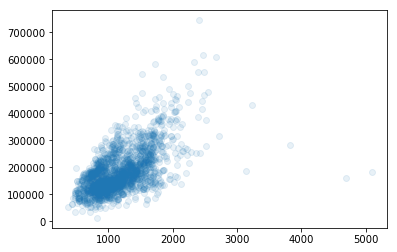

In [31]:
X = training_data[:,colname_to_index['1st Flr SF']]
Y = training_data[:,colname_to_index['SalePrice']]
plt.scatter(X,Y,alpha=0.1)

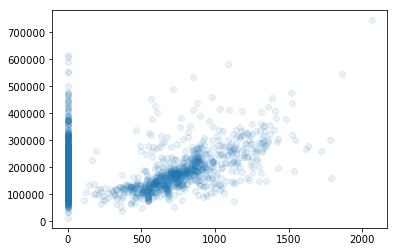

In [32]:
col_to_plot = '2nd Flr SF'
X = training_data[:,colname_to_index[col_to_plot]]
Y = training_data[:,colname_to_index['SalePrice']]
plt.scatter(X,Y,alpha=0.1)

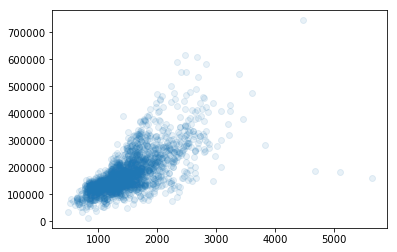

In [33]:
col_to_plot = 'Gr Liv Area'
X = training_data[:,colname_to_index[col_to_plot]]
Y = training_data[:,colname_to_index['SalePrice']]
plt.scatter(X,Y,alpha=0.1)

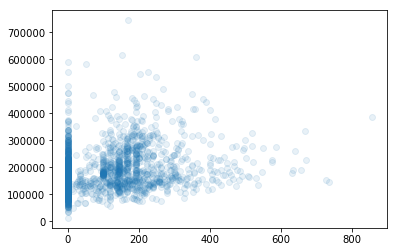

In [34]:
col_to_plot = 'Wood Deck SF'
X = training_data[:,colname_to_index[col_to_plot]]
Y = training_data[:,colname_to_index['SalePrice']]
plt.scatter(X,Y,alpha=0.1)

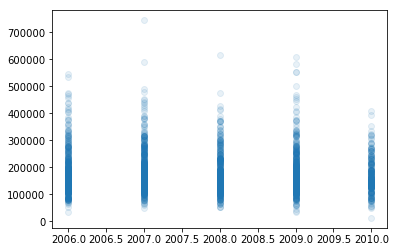

In [35]:
col_to_plot = 'Yr Sold'
X = training_data[:,colname_to_index[col_to_plot]]
Y = training_data[:,colname_to_index['SalePrice']]
plt.scatter(X,Y,alpha=0.1)

These all seem to be related to price. We have of-course not exhausted all properties but it might be interesting to choose these and move forward in the sake of time.

* `'2nd Flr SF'` seems to be interesting. Whenever it is non-zero it seems related to price, and when it is zero, it contains no information.

## Question: If we want to build a linear regression algorithm, or even using PCA or the likes, what should we do about `'2nd Flr SF'`

In [36]:
selected_features = ['Lot Area','1st Flr SF','2nd Flr SF','Gr Liv Area','Wood Deck SF']

In [37]:
selected_indices = [colname_to_index[feature] for feature in selected_features]

In [38]:
X = np.array(training_data[:,selected_indices],dtype=float)
Y = np.array(training_data[:,colname_to_index['SalePrice']],dtype=float)

In [39]:
X.shape

(2051, 5)

In [40]:
X.shape

(2051, 5)

In [41]:
X_new1 = np.append(X,(X[:,2:3] > 0)*1,axis=1)

In [42]:
X_new2 = np.append(X_new1,(X_new1[:,4:5] > 0)*1,axis=1)

In [43]:
X_new2

array([[1.0206e+04, 1.5630e+03, 0.0000e+00, ..., 1.4400e+02, 0.0000e+00,
        1.0000e+00],
       [9.3500e+03, 1.3130e+03, 0.0000e+00, ..., 1.7200e+02, 0.0000e+00,
        1.0000e+00],
       [7.7630e+03, 1.2830e+03, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [8.1270e+03, 8.1200e+02, 8.4100e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.0800e+04, 7.2000e+02, 4.7200e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.0007e+04, 1.0530e+03, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

Let us perform PCA to see how our data looks like.

In [44]:
import numpy as np

class PCA(object):

    def __init__(self,n_components,whiten=False):
        self.n_components =  n_components
        self.components=None
        self.singular_values=None
        self.dimension=None
        self.mean=None
        self.std = None
        self.whiten = whiten

    def fit(self,X):
        assert(type(X) == np.ndarray), "Please input type np.ndarray!"
        assert(len(X.shape) == 2), "Please input 2d array!"
        assert(min(X.shape[1],X.shape[0]) >= self.n_components), "min(X.shape[1],X.shape[0]) >= self.n_components!"
        print("Number of data_points: %d, number of features: %d, Number of components: %d" %(X.shape[0],X.shape[1],self.n_components))
        
        if (self.whiten):
            X = self._whiten(X)
        else:
            X = self._center(X) # Make sure the data is centered (each feature has empirical mean zero)
            
        self.dimension=X.shape[1] # This is the dimension of the data
        self.components,self.singular_values = self._compute(X) # Compute the singular vectors
        
    def _center(self,X):
        self.mean = np.mean(X,axis=0).reshape(1,-1)
        return X-self.mean
    
    def _whiten(self,X):
        self.std = np.std(X,axis=0).reshape(1,-1)
        return self._center(X)/self.std
        
    def transform(self,X):
        if (type(self.components) == None):
            raise Exception("Not fitted yet!")
        
        assert(type(X) == np.ndarray), "Please input type np.ndarray!"
        assert(len(X.shape) == 2), "Please input 2d array!"
        assert(X.shape[1] == self.dimension), "Incorrect number of features!"
        
        if (self.whiten):
            return ((X-self.mean)/self.std)@self.components
        else:
            return (X-self.mean)@self.components
    
    def inverse_transform(self,X):
        if (type(self.components) == None):
            raise Exception("Not fitted yet!")
        
        assert(type(X) == np.ndarray), "Please input type np.ndarray!"
        assert(len(X.shape) == 2), "Please input 2d array!"
        assert(X.shape[1] == self.n_components), "Incorrect number of features!"
        
        if (self.whiten):
            return (X@self.components.T)*self.std+self.mean
        else:
            return X@self.components.T+self.mean
    
    def project(self,X):
        return self.inverse_transform(self.transform(X))
        
    def _compute(self,X):
        U,D,VT = np.linalg.svd(X,full_matrices=False)
        return (VT.T)[:,:self.n_components],D

In [45]:
pca = PCA(n_components=7,whiten=True)
pca.fit(X_new2)

Number of data_points: 2051, number of features: 7, Number of components: 7


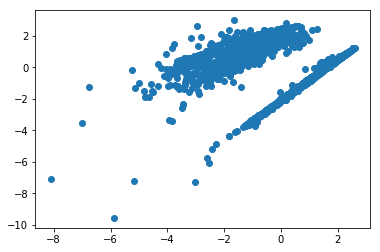

In [46]:
transformed_data = pca.transform(X_new2)
plt.scatter(transformed_data[:,0],transformed_data[:,1])

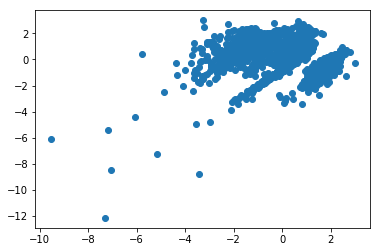

In [47]:
plt.scatter(transformed_data[:,1],transformed_data[:,2])

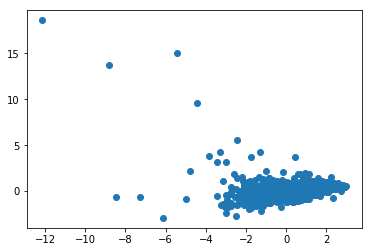

In [48]:
plt.scatter(transformed_data[:,2],transformed_data[:,3])

## Performing linear regression

In [49]:
from scipy.linalg import lstsq

# Design matrix
M1 = np.append(transformed_data,(transformed_data[:,0:1])^0,axis=1)
M1

array([[ 0.23303286, -1.7695769 ,  0.23193891, ...,  0.0763196 ,
        -0.00336493,  1.        ],
       [ 0.50483788, -1.4437376 ,  0.83304113, ..., -0.02415666,
        -0.00371947,  1.        ],
       [ 1.57359967, -0.00591216, -0.73368651, ..., -0.07373196,
        -0.00872032,  1.        ],
       ...,
       [-0.7150499 ,  2.10466719, -0.46553133, ..., -0.09255082,
        -0.00916194,  1.        ],
       [ 0.21036483,  1.94824415, -0.13623967, ...,  0.47475538,
         0.00307291,  1.        ],
       [ 1.8346541 ,  0.2908954 , -0.42232586, ..., -0.16367197,
        -0.00878302,  1.        ]])

In [50]:
p, res, rnk, s = lstsq(M1, Y)

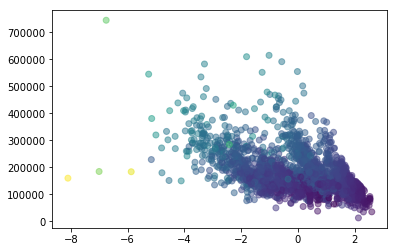

In [51]:
plt.scatter(transformed_data[:,0],Y,c=M1@p,alpha=0.5)

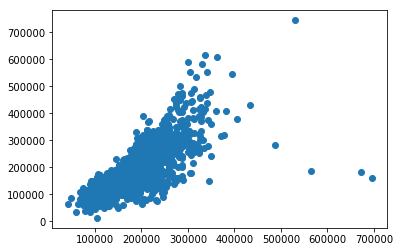

In [52]:
plt.scatter(M1@p,Y)

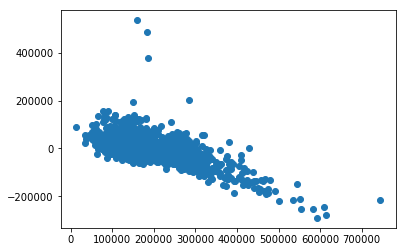

In [53]:
plt.scatter(Y,M1@p-Y)

In [54]:
print("R^2 is: %.2f" % (1-np.var(Y-M1@p)/np.var(Y)))

R^2 is: 0.58


## What happens on the training set?

In [55]:
X_test = np.array(test_data[:,selected_indices],dtype=float)
Y_test = np.array(test_data[:,colname_to_index['SalePrice']],dtype=float)

X_new1_test = np.append(X_test,(X_test[:,2:3] > 0)*1,axis=1)

X_new2_test = np.append(X_new1_test,(X_new1_test[:,4:5] > 0)*1,axis=1)

In [56]:
transformed_data_test = pca.transform(X_new2_test)
M1_test = np.append(transformed_data_test,(transformed_data_test[:,0:1])^0,axis=1)
print("R^2 is: %.2f" % (1-np.var(Y_test-M1_test@p)/np.var(Y_test)))

R^2 is: 0.68


## Question: What does this mean?

In [57]:
Y = np.array(training_data[:,-1],dtype=float)
Y_test = np.array(test_data[:,-1],dtype=float)

In [58]:
X_pre = training_data[:,:-1]
X_pre_test = test_data[:,:-1]

In [59]:
X_replaced = np.nan_to_num(np.array(X_pre,dtype=float),0)
X_replaced_test = np.nan_to_num(np.array(X_pre_test,dtype=float),0)

In [60]:
pca_full = PCA(n_components=7,whiten=True)
pca_full.fit(X_replaced)

Number of data_points: 2051, number of features: 81, Number of components: 7


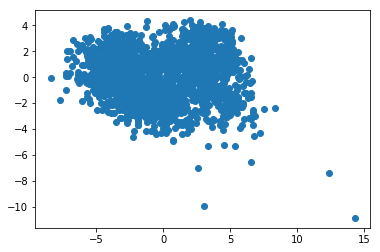

In [61]:
transformed_data2 = pca_full.transform(X_replaced)
plt.scatter(transformed_data2[:,0],transformed_data2[:,1])

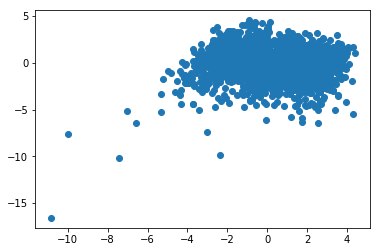

In [62]:
plt.scatter(transformed_data2[:,1],transformed_data2[:,2])

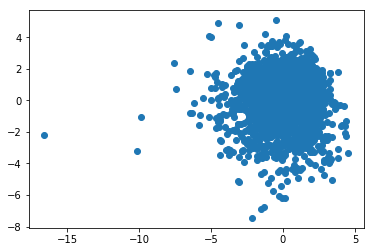

In [63]:
plt.scatter(transformed_data2[:,2],transformed_data2[:,3])

In [64]:
from scipy.linalg import lstsq

# Design matrix
M2 = np.append(X_replaced,(X_replaced[:,0:1])^0,axis=1)
M2

array([[8.370e+02, 2.224e+03, 1.000e+01, ..., 7.000e+00, 2.000e+00,
        1.000e+00],
       [1.173e+03, 2.784e+03, 1.000e+01, ..., 7.000e+00, 2.000e+00,
        1.000e+00],
       [2.008e+03, 8.200e+01, 1.000e+01, ..., 7.000e+00, 2.000e+00,
        1.000e+00],
       ...,
       [1.539e+03, 3.860e+02, 9.000e+00, ..., 7.000e+00, 2.000e+00,
        1.000e+00],
       [7.050e+02, 3.600e+01, 1.400e+01, ..., 7.000e+00, 1.000e+00,
        1.000e+00],
       [6.110e+02, 1.762e+03, 1.000e+01, ..., 7.000e+00, 2.000e+00,
        1.000e+00]])

In [75]:
p2, res2, rnk2, s2 = lstsq(M2, Y)

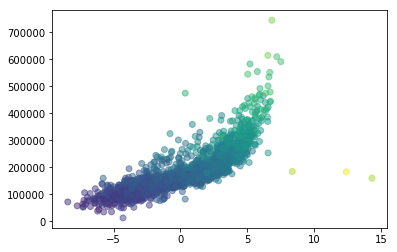

In [76]:
plt.scatter(transformed_data2[:,0],Y,c=M2@p2,alpha=0.5)

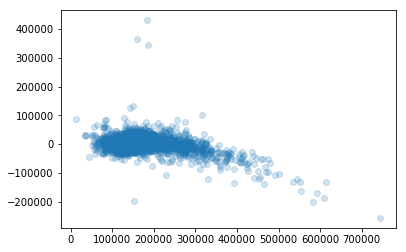

In [77]:
plt.scatter(Y,M2@p2-Y,alpha=0.2)

In [78]:
print("R^2 is: %.2f" % (1-np.var(Y-M2@p2)/np.var(Y)))

R^2 is: 0.84


## What about the training R^2?

In [79]:
M2_test = np.append(X_replaced_test,(X_replaced_test[:,0:1])^0,axis=1)
M2_test
print("R^2 is: %.2f" % (1-np.var(Y_test-M2_test@p2)/np.var(Y_test)))

R^2 is: 0.84


## What would you do now?

What to do now depends on how much you want to accomplish.

* Use the methods from notebook `14.ipynb` to estimate a confidence interval for R^2.
* We could also use non-parametric methods to get a confidence bound for the residual.
* Use cross validation to check if we should choose the small or the big model
* We could try to use the fisher information to get confidence bounds for the coefficients of our model and try to do hypothesis tests concerning non-negative coefficients. Question: is this really reasonable w.r.t. the bigger model? Question: is this OK, the residual is systematic...
* Based on the residual it might be interesting to consider a quadratic regression model to reduce the systematic error.
* Based on the data. There are groups of houses, what are these groups. Could we explore and reason about the data to extract those? Could this improve the models?

## Tips for the future:

We have in this course purposefully worked close to the data, i.e. we have worked by directly parsing the data. This might seem like a backwards approach, but remember, we are here to learn! Secondly, not all data can be automatically handled. Think of the data in this notebook, is it easy to infer what is numerical and what is categorical? Should we care? How should we handle missing data? Can the fact that data is missing actually be information? Could we use this somehow?

### Very useful packages

* Pandas (data loading and exploration) (https://pandas.pydata.org/)
* Sklearn (data preprocessing, models, etc.) (https://scikit-learn.org/stable/)

## Thank you very much for this time, and good luck!